In [1]:
import torch
import random
import numpy as np
from d2l import torch as d2l

random.seed(7)
np.random.seed(7)

In [2]:
w_true = [2, -3.4]
b_true = 4.2
num_sample = 1000
batch_size = 10
lr = 0.03
epochs = 5

In [3]:
# 生成数据集
def generate_data(num_sample, w_true):
    X = torch.normal(0, 1, size=(num_sample, len(w_true)))
    y = torch.matmul(X, torch.tensor(w_true)) + b_true
    y += torch.normal(0, 0.01, size=(y.shape))
    return X,y

In [4]:
# X 是样本    y是标签
X,y = generate_data(num_sample, w_true)

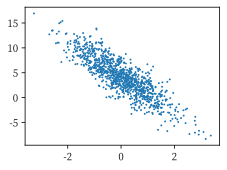

In [5]:
# 可视化数据集
d2l.set_figsize()
d2l.plt.scatter(X[:, 1].detach().numpy(), y.detach().numpy(), 1);

In [6]:
# 小批量取样  批次大小为10
def get_batch(num_sample, X, y, batch_size):
    indices = list(range(num_sample))
    np.random.shuffle(indices)
    #print('indices is:')
    #print(indices)
    for i in range(0, num_sample, batch_size):
        #print(i)
        #print(indices[i:(i+batch_size)])
        #print(y[indices[i:(i+batch_size)]])
        yield X[indices[i:(i+batch_size)],:], y[indices[i:(i+batch_size)]]

In [7]:
for X_, y_ in get_batch(num_sample, X, y, batch_size):
    print(X_, '\n', y_)
    break

tensor([[ 0.9514,  1.0196],
        [ 0.1838,  0.0800],
        [-0.9911, -0.5823],
        [-2.4274,  0.4039],
        [-1.6664, -0.3180],
        [-0.5478, -1.3825],
        [-0.1104, -0.1255],
        [ 1.1290,  1.2918],
        [ 0.3682, -1.5520],
        [-0.5798, -0.1450]]) 
 tensor([ 2.6358,  4.3033,  4.2030, -2.0304,  1.9440,  7.7996,  4.3884,  2.0670,
        10.2234,  3.5321])


In [8]:
# 构建线性回归模型
def linear_model(X_, w_parma, b_param):
    y_hat = torch.matmul(X_, w_parma) + b_param
    return y_hat

In [9]:
# 初始化参数
#w_parma = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
w_parma = torch.zeros([2, 1], dtype=torch.float, requires_grad=True)
b_param = torch.zeros(1, requires_grad=True)

In [10]:
# 构建损失函数
def get_loss(X_, w_parma, b_param, y_):
    y_hat = linear_model(X_, w_parma, b_param)
    #print(y_hat.shape)
    #print(y_.shape)
    loss = (y_hat.reshape(y_.shape) - y_) ** 2 / 2
    return loss

In [11]:
# 构建参数优化器
def sgd(w_parma, b_param, lr, batch_size):
    with torch.no_grad():
        #print('w_parma.grad is', w_parma.grad)
        
        #w_parma -= lr * w_parma.grad
        #b_param -= lr * b_param.grad
        
        w_parma -= lr * w_parma.grad / batch_size
        b_param -= lr * b_param.grad / batch_size
        
        w_parma.grad.zero_()
        b_param.grad.zero_()

In [12]:
# 训练
#for epoch in range(1):
for epoch in range(epochs):
    for X_, y_ in get_batch(num_sample, X, y, batch_size):
        loss = get_loss(X_, w_parma, b_param, y_)
        loss.sum().backward()
        sgd(w_parma, b_param, lr, batch_size)
    with torch.no_grad():
        train_loss = get_loss(X, w_parma, b_param, y)
        print(f'epoch {epoch + 1}, loss {float(train_loss.mean()):f}')

epoch 1, loss 0.041263
epoch 2, loss 0.000157
epoch 3, loss 0.000055
epoch 4, loss 0.000054
epoch 5, loss 0.000055


In [13]:
with torch.no_grad():
    print(w_parma.numpy().reshape(2) - np.array(w_true))
    print(b_param.numpy() - b_true)

[ 4.06503677e-04 -2.95639038e-06]
[-0.00097132]
